In [51]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import os
os.getcwd()

'/home/samuel/Marble/MarbleBot'

In [163]:

def get_data(direct):
    data =[]
    for i in range(84):
        with open(direct+str(i)+".p", "rb") as f:
            epoch = pickle.load(f)
            data += [epoch]

    max_ret = []
    min_ret = []
    avg_return = []
    max_len =[]
    min_len = []
    avg_len = []
    avg_ene = []
    avg_clipped = [] 
    avg_dist = []
    avg_abs_dist = []
    pi_l = []
    val_l = []
    kl = []
    cf = []
    ent = []

    for epoch in data:
        max_ret.append(epoch[0][0])
        min_ret.append(epoch[0][1])
        avg_return.append(epoch[0][2])
        max_len.append(epoch[0][3])
        min_len.append(epoch[0][4])
        avg_len.append(epoch[0][5])
        avg_ene.append(epoch[0][6])
        avg_clipped.append(epoch[0][7])
        avg_dist.append(epoch[0][8])
        avg_abs_dist.append(epoch[0][9])
        pi_l.append(epoch[1][0])
        val_l.append(epoch[1][1])
        kl.append(epoch[1][2])
        cf.append(epoch[1][3])
        ent.append(epoch[1][4])
    
    
    return [max_ret, min_ret, avg_return, max_len, min_len, 
    avg_len, avg_ene, avg_clipped, avg_dist, avg_abs_dist, pi_l,
    val_l, kl, cf, ent]

In [164]:
def plot_data(data, timesteps):
    #return with min/max
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[2])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[2])
    plt.fill_between(x,data[0],data[1], alpha=0.5)
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("return")
    plt.title("average episode return (max/min)")
    
    #length with min/max
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[5])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[5])
    plt.fill_between(x,data[3],data[4], alpha=0.5)
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("steps survived")
    plt.title("average episode length (max/min)")
    
    #average energy, action clipping and distance
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[6])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[6], label="energy")
    plt.plot(x,data[7], label="clipping")
    plt.plot(x,data[8], label="distance")
    plt.legend(loc="upper left")
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("energy usage")
    plt.title("average reward composition")
    
    #policy loss 
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[9])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[10])
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("loss")
    plt.title("policy loss")
    
    #value loss 
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[10])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[11])
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("loss")
    plt.title("value loss")
    
    #clip fraction
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[10])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[13])
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("percentage")
    plt.title("fraction of times the clip range hyperparameter is used")
    
    #entropy
    plt.figure(figsize=(6,3))
    x = np.arange(len(data[10])) * timesteps / 1000
    ret = plt.subplot(111)
    plt.plot(x,data[14])
    plt.xlabel("simulation steps in thousand", )
    plt.ylabel("S")
    plt.title("entropy")

In [165]:
path = "sim/webots/controllers/RL_controller"
direct = path+"/sums_first_trial/sum_ep""

data = get_data(direct)
plot_data(data, 4000)

SyntaxError: EOL while scanning string literal (<ipython-input-165-89431ea02171>, line 2)

In [166]:
#having increasing value loss is a good sign of exploration (note that it is not a stationary statistic)

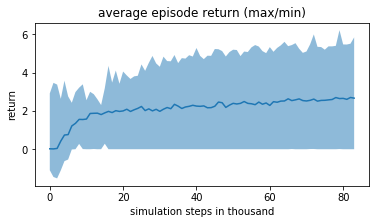

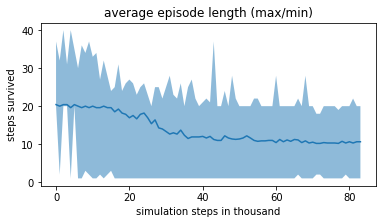

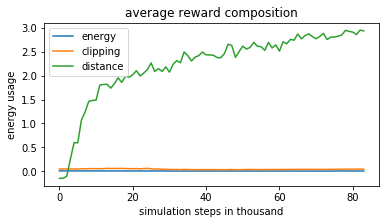

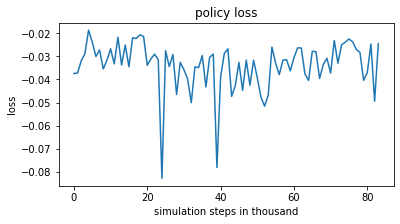

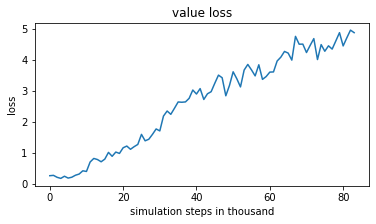

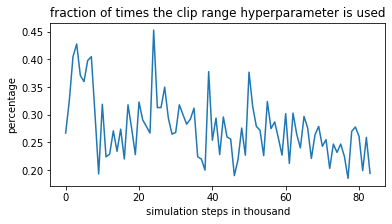

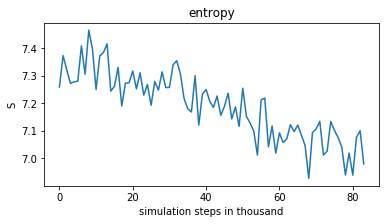

In [171]:
path = "sim/webots/controllers/RL_controller"
direct = path+"/sum_small_horizon_i/"

data = get_data(direct)
plot_data(data, 1000)

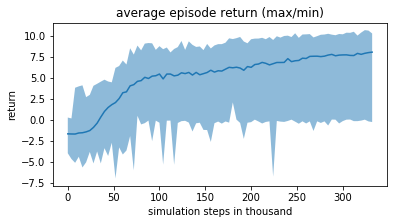

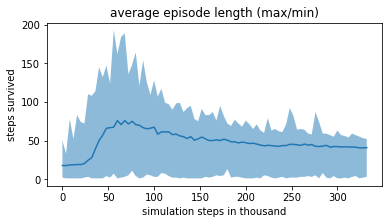

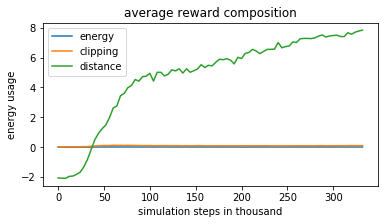

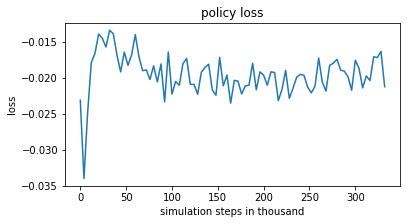

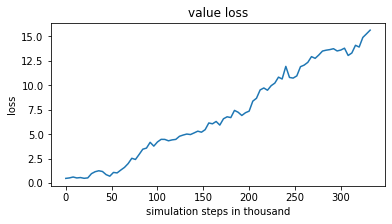

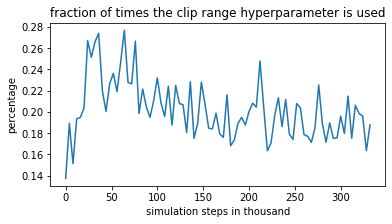

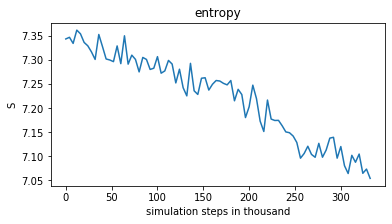

In [172]:
path = "sim/webots/controllers/RL_controller"
direct = path+"/sum_squash_cp_i/"

data = get_data(direct)
plot_data(data, 4000)

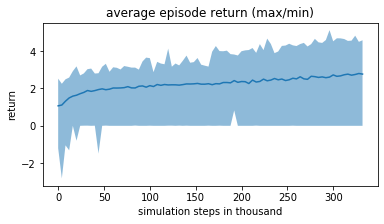

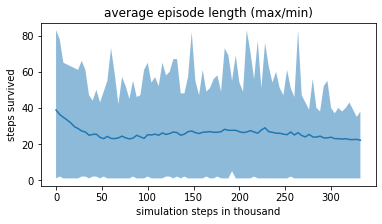

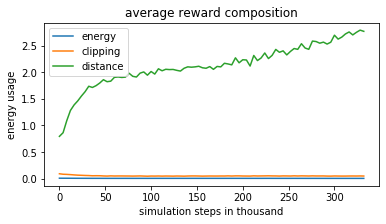

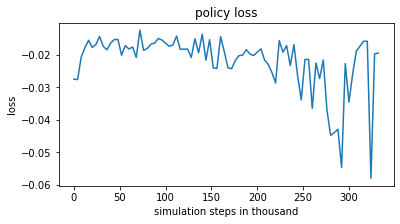

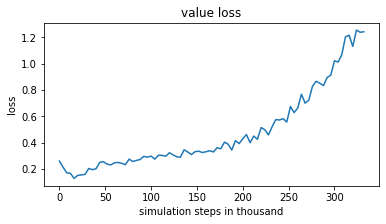

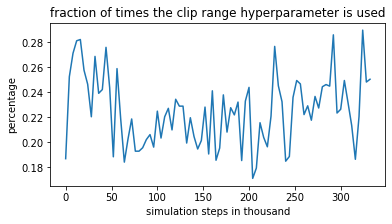

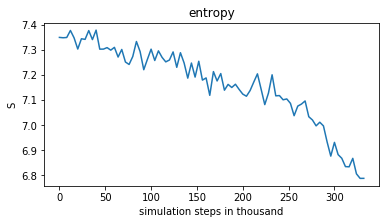

In [173]:
path = "sim/webots/controllers/RL_controller"
direct = path+"/sum_squash_i/"

data = get_data(direct)
plot_data(data, 4000)